## ECEN 524 -- Project 1, Part 1 -- Plot Trajectory Data and Identify Points of Interest
### Peter (Yinghao) Chen and Nicholas Kenny

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from scipy.signal import find_peaks
import numpy as np

def load_trajectory_data(file_paths):
    """
    Load multiple trajectory CSV files into a list of dataframes
    """
    trajectories = []
    for path in file_paths:
        df = pd.read_csv(path)
        trajectories.append(df)
    return trajectories

def plot_3d_trajectory(df, title="3D End Effector Trajectory"):
    """
    Create a 3D plot of the end effector position
    """
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    scatter = ax.scatter(df['EE Position x'], 
                        df['EE Position y'], 
                        df['EE Position z'],
                        c=df['Time'],
                        cmap='viridis')
    
    plt.colorbar(scatter, label='Time')
    ax.set_xlabel('X Position')
    ax.set_ylabel('Y Position')
    ax.set_zlabel('Z Position')
    ax.set_title(title)
    return fig

def plot_finger_analysis(df, title="Finger Movement Analysis"):
    """
    Plot finger positions, velocities, and efforts
    """
    fig, axes = plt.subplots(3, 1, figsize=(12, 12))
    
    # Position plot
    axes[0].plot(df['Time'], df['Left Finger Position'], label='Left Finger')
    axes[0].plot(df['Time'], df['Right Finger Position 2'], label='Right Finger')
    axes[0].set_ylabel('Position')
    axes[0].set_title('Finger Positions over Time')
    axes[0].legend()
    
    # Velocity plot
    axes[1].plot(df['Time'], df['Left Finger Velocity'], label='Left Finger')
    axes[1].plot(df['Time'], df['Right Finger Velocity'], label='Right Finger')
    axes[1].set_ylabel('Velocity')
    axes[1].set_title('Finger Velocities over Time')
    axes[1].legend()
    
    # Effort plot
    axes[2].plot(df['Time'], df['Left Finger Effort 1'], label='Left Finger')
    axes[2].plot(df['Time'], df['Right Finger Effort 2'], label='Right Finger')
    axes[2].set_ylabel('Effort')
    axes[2].set_title('Finger Efforts over Time')
    axes[2].legend()
    
    plt.tight_layout()
    return fig

def find_points_of_interest(df):
    """
    Identify potentially interesting points in the trajectory
    """
    points_of_interest = {
        'grasp_points': [],
        'direction_changes': [],
        'high_effort_points': []
    }
    
    # Detect potential grasp points (when fingers are close together)
    finger_distance = abs(df['Left Finger Position'] - df['Right Finger Position 2'])
    grasp_threshold = np.mean(finger_distance) - np.std(finger_distance)
    grasp_points = df[finger_distance < grasp_threshold].index
    points_of_interest['grasp_points'] = grasp_points
    
    # Detect direction changes in end effector movement
    for coord in ['x', 'y', 'z']:
        velocity = np.gradient(df[f'EE Position {coord}'])
        peaks, _ = find_peaks(abs(velocity))
        points_of_interest['direction_changes'].extend(peaks)
    
    # Detect high effort points
    effort_threshold = (df['Left Finger Effort 1'].max() + df['Right Finger Effort 2'].max()) / 2
    high_effort_points = df[(df['Left Finger Effort 1'] > effort_threshold) | 
                           (df['Right Finger Effort 2'] > effort_threshold)].index
    points_of_interest['high_effort_points'] = high_effort_points
    
    return points_of_interest

def analyze_trajectory(file_path):
    """
    Complete analysis of a single trajectory file
    """
    # Load data
    df = pd.read_csv(file_path)
    
    # Create visualizations
    trajectory_plot = plot_3d_trajectory(df)
    finger_plot = plot_finger_analysis(df)
    
    # Find points of interest
    poi = find_points_of_interest(df)
    
    # Print summary statistics
    print(f"\nTrajectory Analysis Summary for {file_path}")
    print("-" * 50)
    print(f"Duration: {df['Time'].max() - df['Time'].min():.2f} seconds")
    print(f"Number of grasp points detected: {len(poi['grasp_points'])}")
    print(f"Number of direction changes: {len(poi['direction_changes'])}")
    # print(f"Number of high effort points: {len(poi['high_effort_points'])}")
    
    return df, trajectory_plot, finger_plot, poi

def compare_trajectories(trajectories):
    """
    Create comparison visualizations for multiple trajectories
    """
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    colors = plt.cm.viridis(np.linspace(0, 1, len(trajectories)))
    
    for i, df in enumerate(trajectories):
        ax.plot3D(df['EE Position x'], 
                 df['EE Position y'], 
                 df['EE Position z'], 
                 color=colors[i], 
                 label=f'Trajectory {i+1}')
    
    ax.set_xlabel('X Position')
    ax.set_ylabel('Y Position')
    ax.set_zlabel('Z Position')
    ax.set_title('Comparison of Multiple Trajectories')
    ax.legend()
    
    return fig


Trajectory Analysis Summary for Kinesthetic_teaching_take_1.csv
--------------------------------------------------
Duration: 78.73 seconds
Number of grasp points detected: 0
Number of direction changes: 1000
Number of high effort points: 0

Trajectory Analysis Summary for Kinesthetic_teaching_take_2.csv
--------------------------------------------------
Duration: 60.03 seconds
Number of grasp points detected: 0
Number of direction changes: 684
Number of high effort points: 0

Trajectory Analysis Summary for Kinesthetic_teaching_take_3.csv
--------------------------------------------------
Duration: 47.47 seconds
Number of grasp points detected: 0
Number of direction changes: 538
Number of high effort points: 0

Trajectory Analysis Summary for Kinesthetic_teaching_take_4.csv
--------------------------------------------------
Duration: 73.10 seconds
Number of grasp points detected: 0
Number of direction changes: 834
Number of high effort points: 0

Trajectory Analysis Summary for Kinest

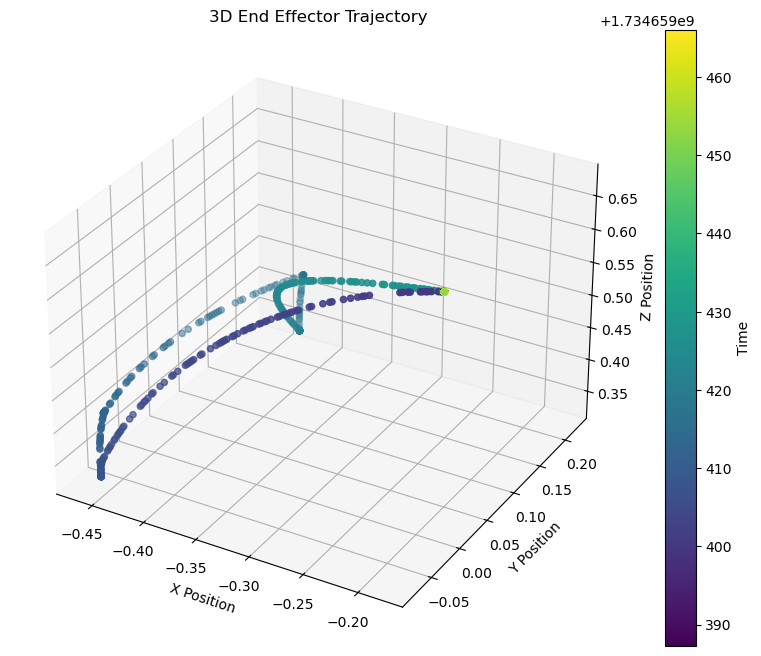

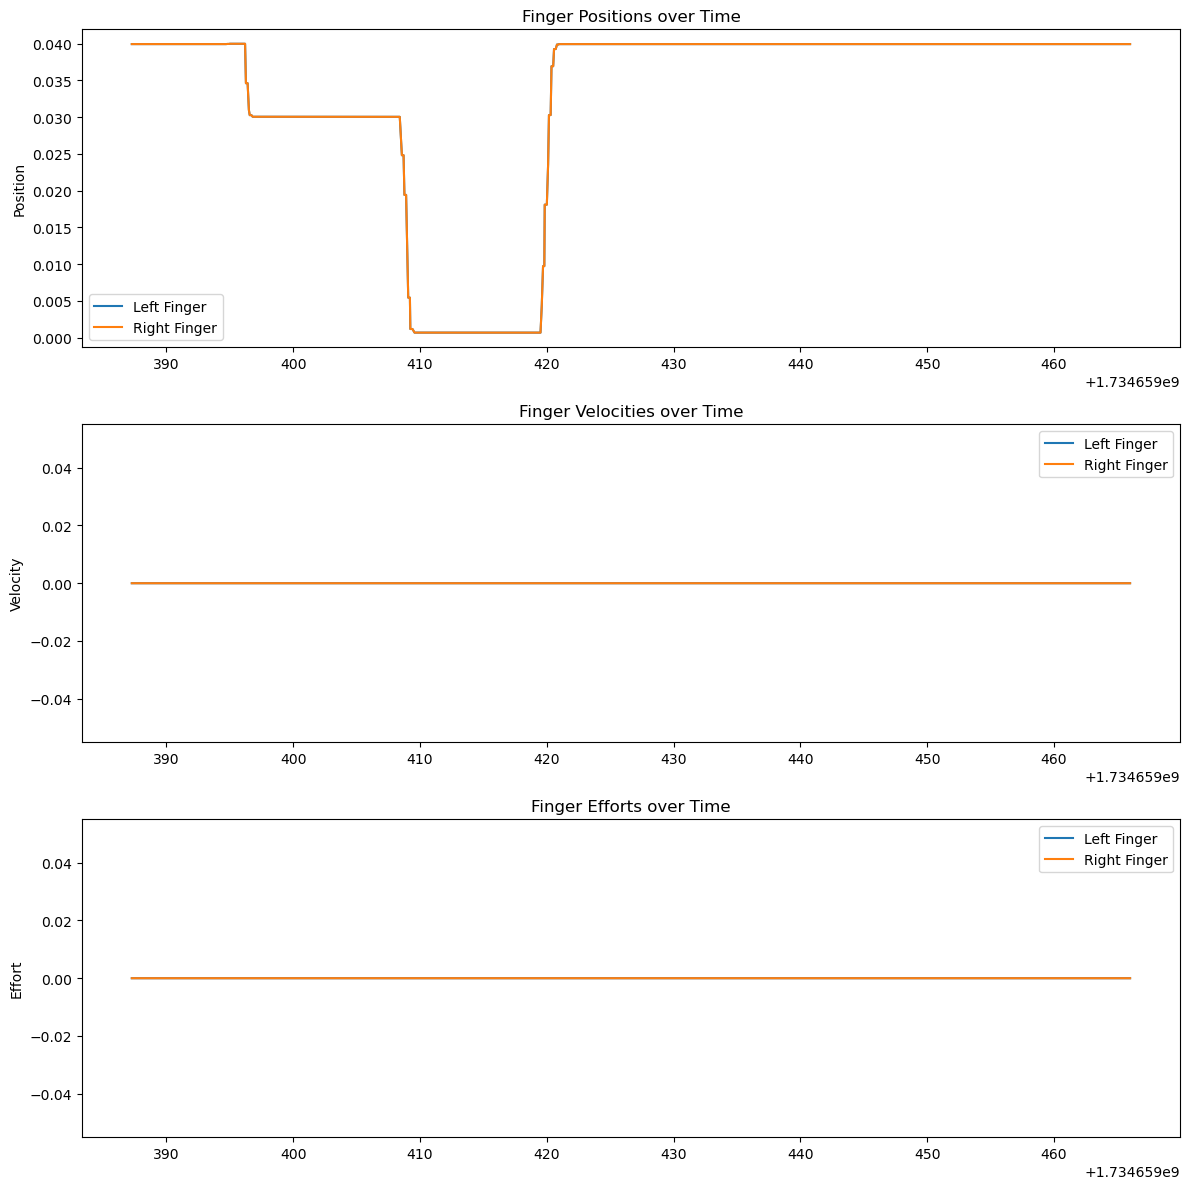

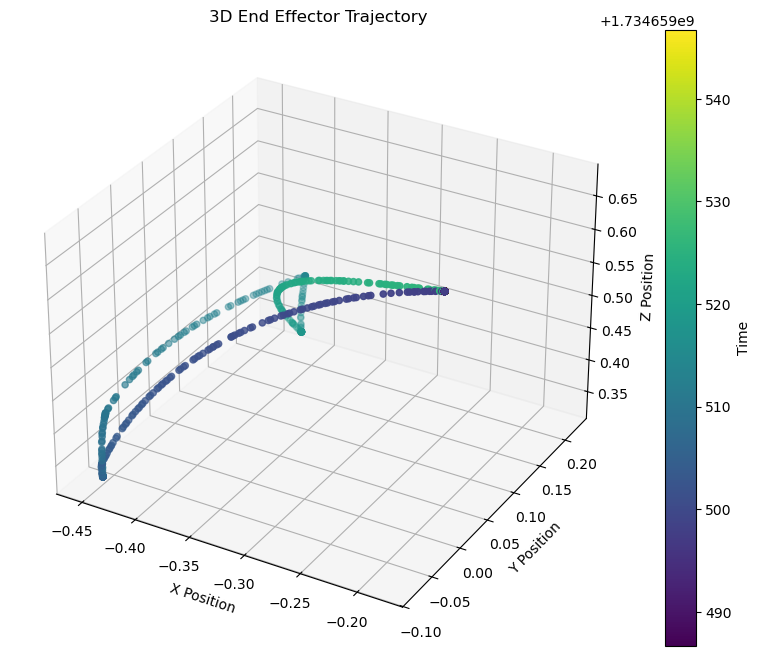

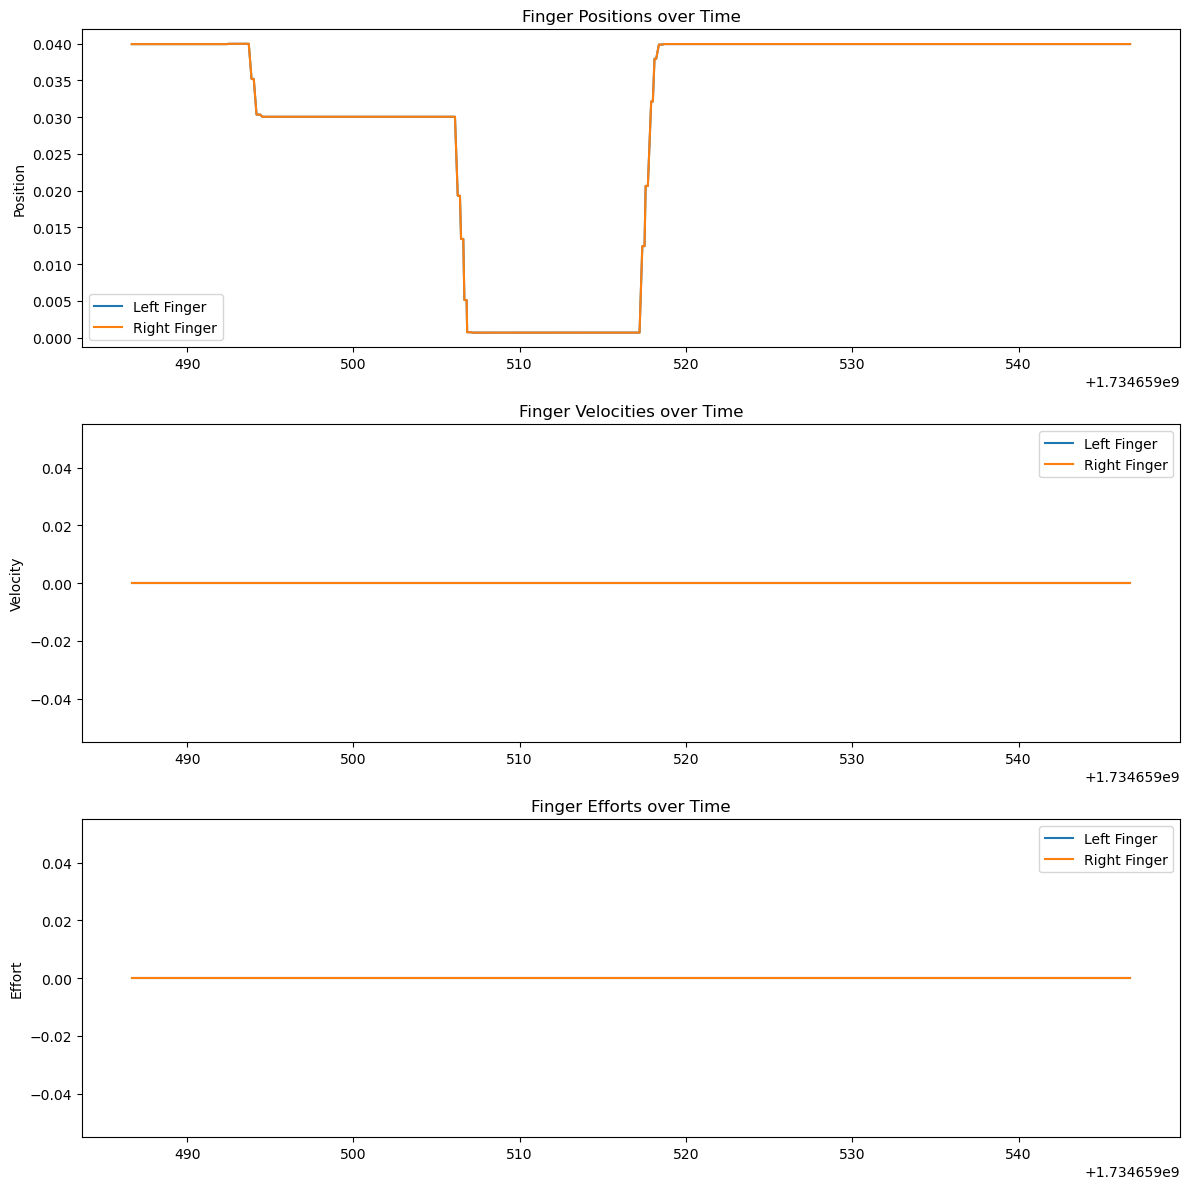

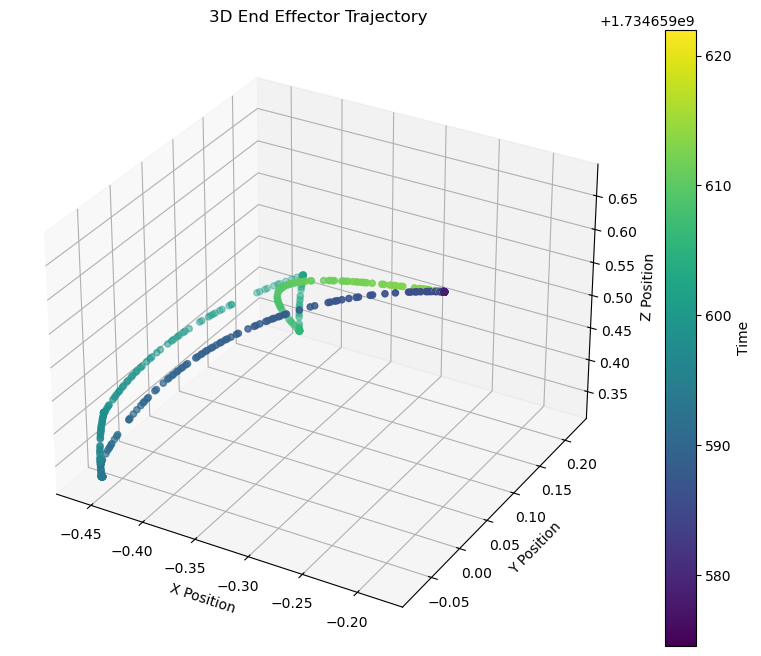

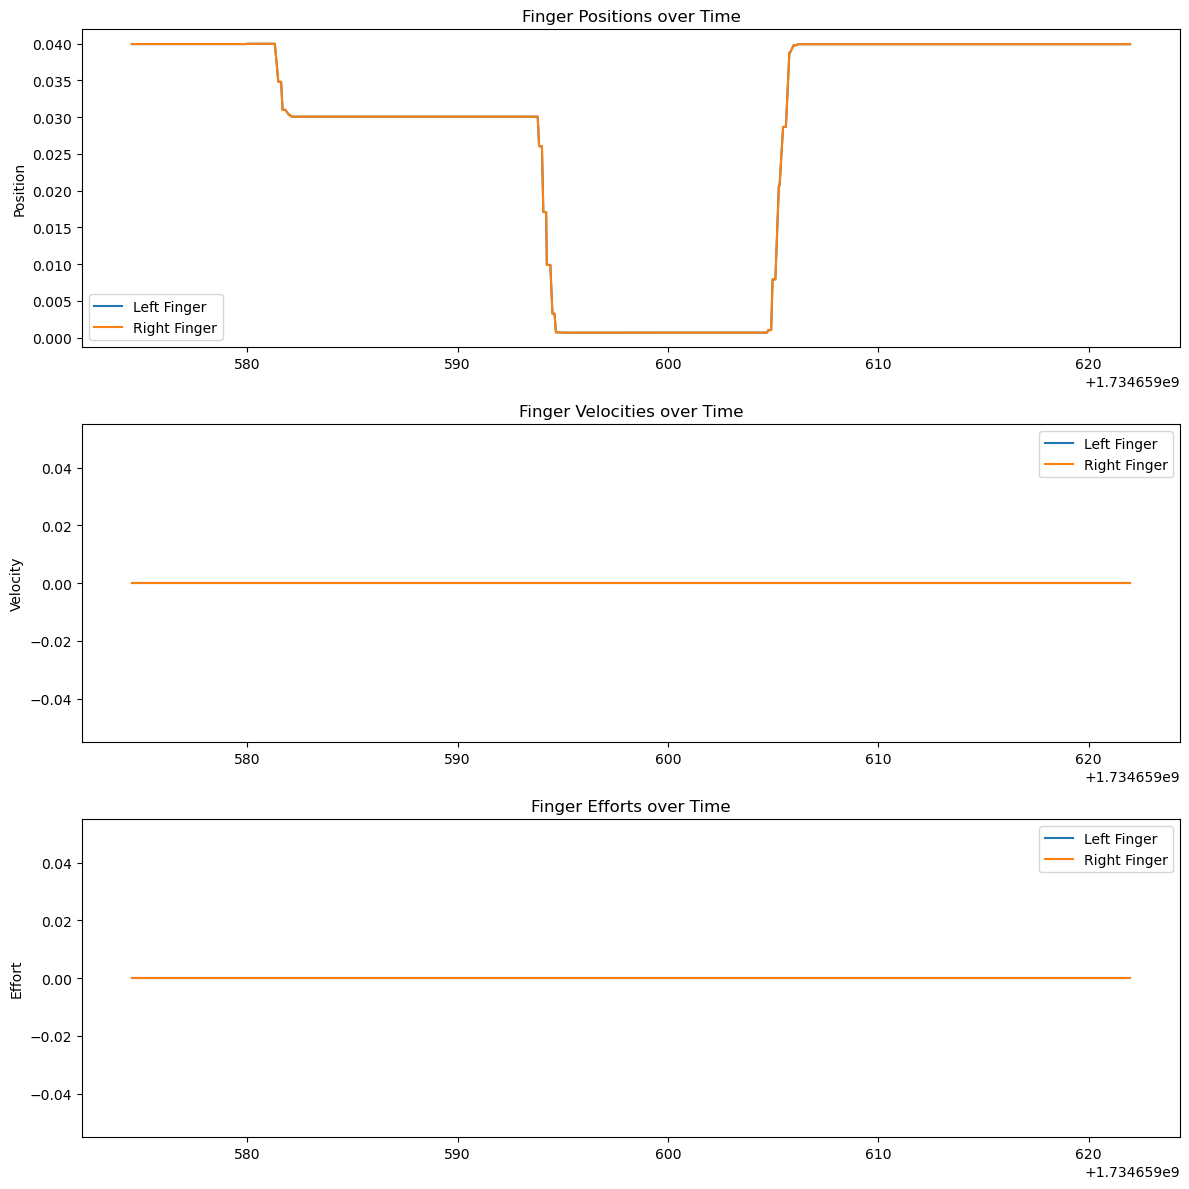

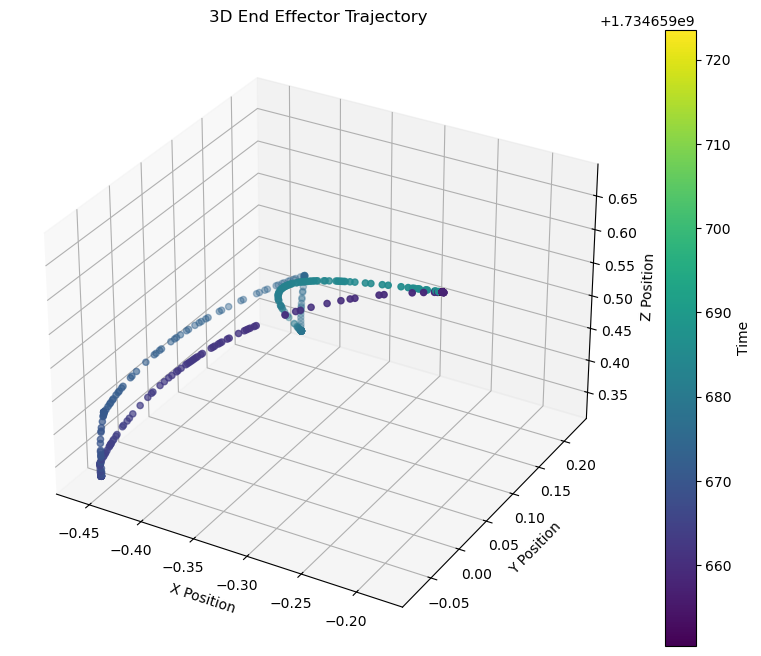

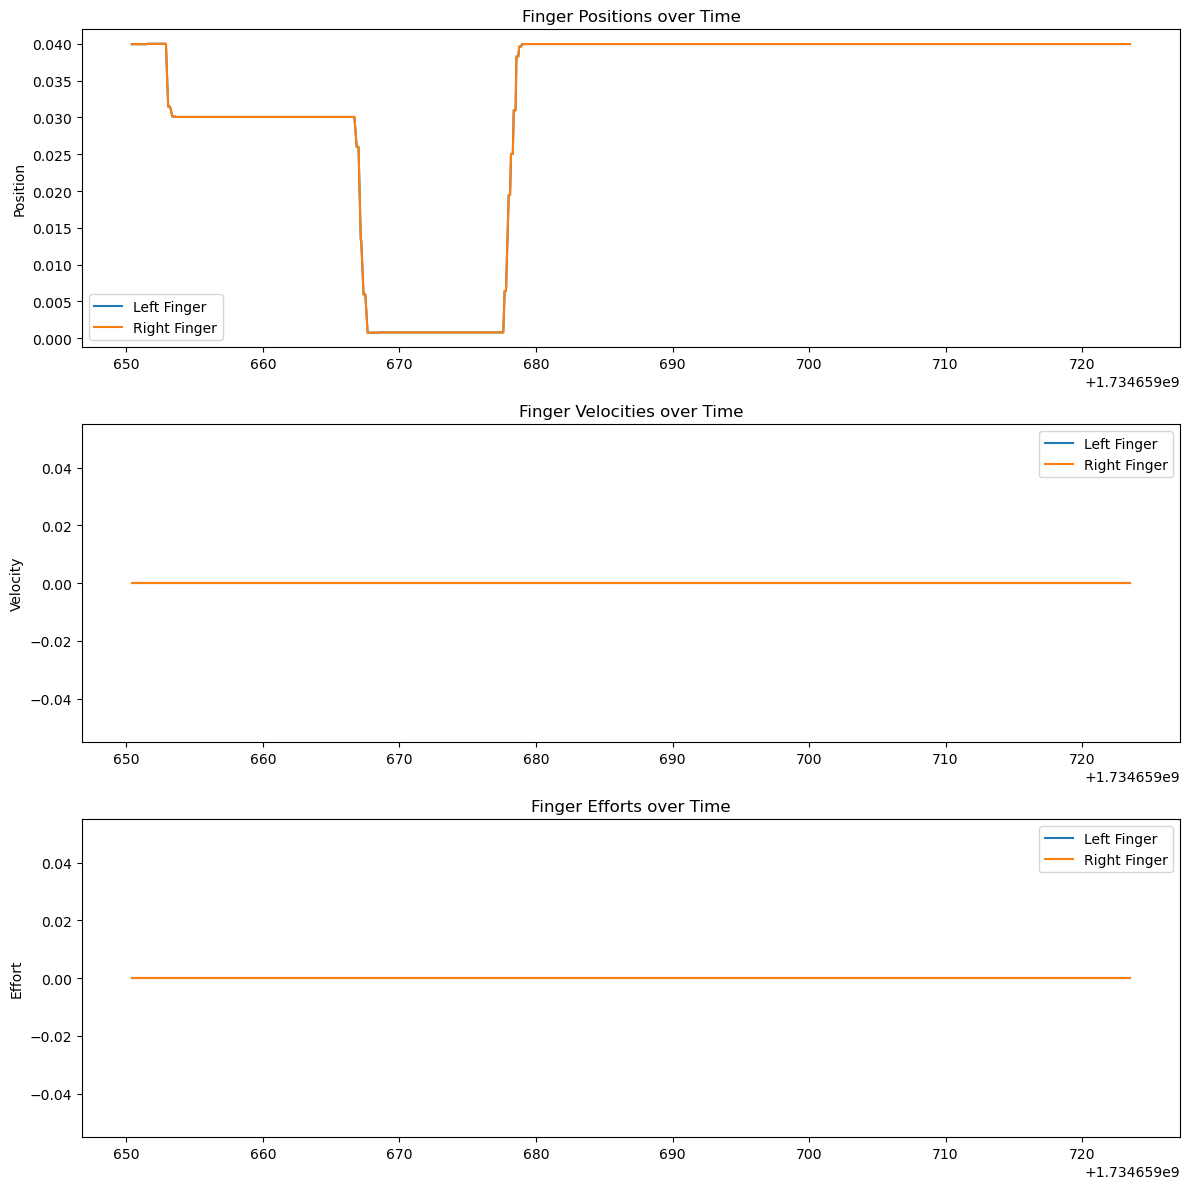

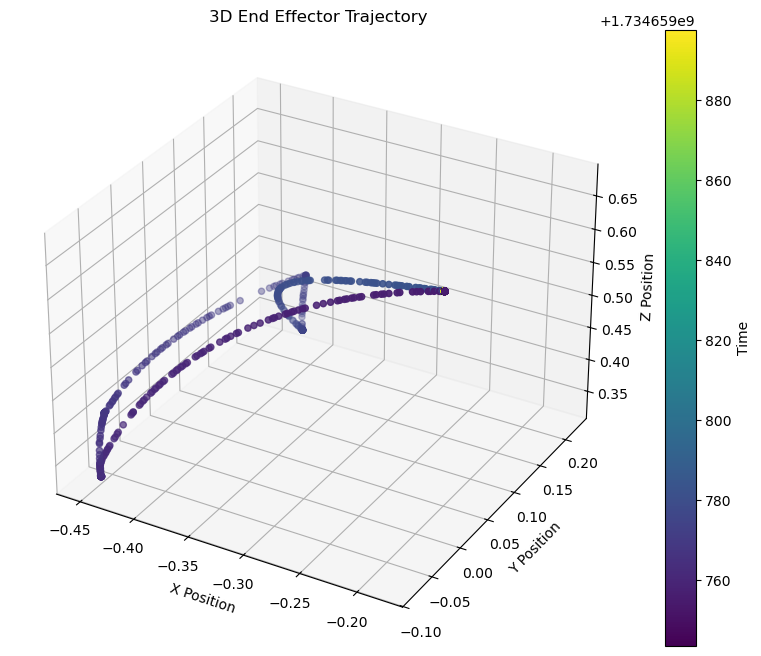

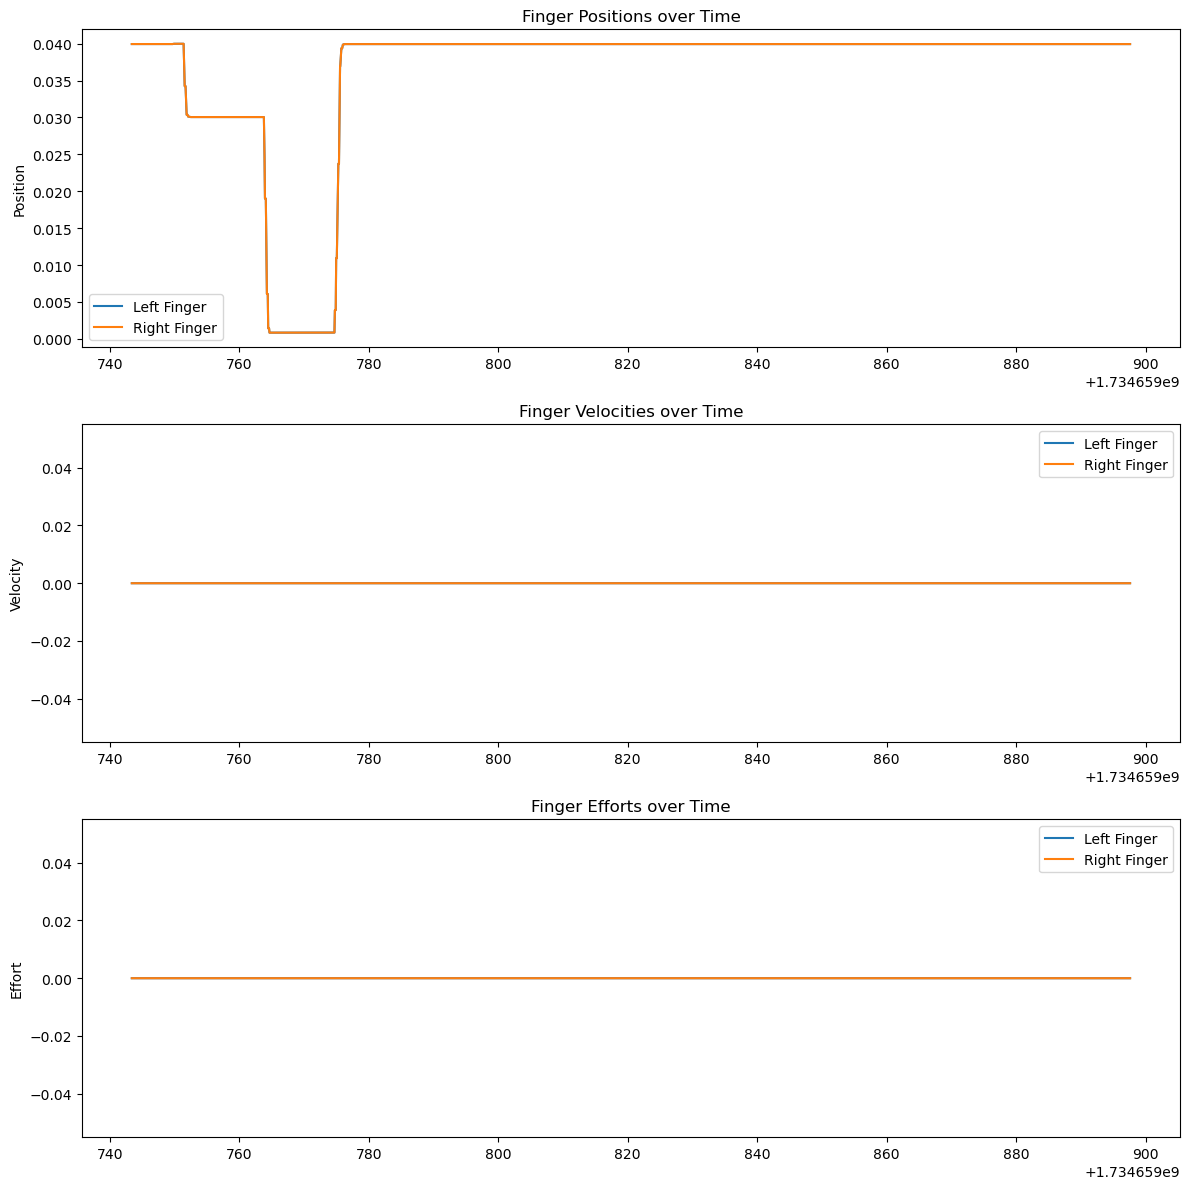

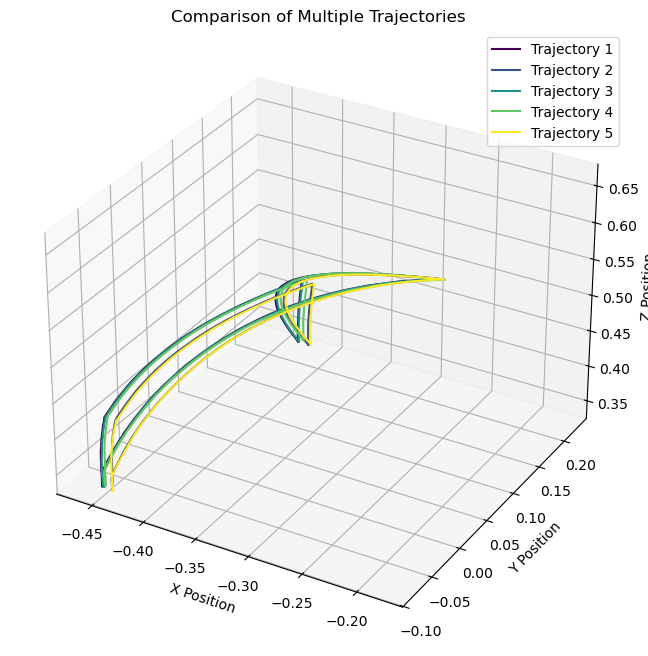

In [4]:
file_paths = ['Kinesthetic_teaching_take_1.csv',
                'Kinesthetic_teaching_take_2.csv',
                'Kinesthetic_teaching_take_3.csv', 
                'Kinesthetic_teaching_take_4.csv', 
                'Kinesthetic_teaching_take_5.csv', 
             ]

# Analyze individual trajectories
trajectories = []
for file_path in file_paths:
    df, traj_plot, finger_plot, poi = analyze_trajectory(file_path)
    trajectories.append(df)
    
# Compare all trajectories
comparison_plot = compare_trajectories(trajectories)
plt.show()